# Haberman EDA Solutions


**Note**

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
Features Information -


1) Age — Age of the person at the time of operation.

2) Op_Year — Year of operation for the respective patient.

3) Axii_Nodes — No of positive axillary nodes detected during the surgery.

4) Surv_Status — Survival status of the patient (1 -> when person survived more than 5 years and 2 -> when person survived less than 5 Years).


##### Your Solutions shall match the Solutions that are shown below some questions. Make sure you are not writing in the same code cell, else shown solution will be deleted.

**Import Relevant Libraries** 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset and Rename the Columns the above mentioned Note** 

In [ ]:
columns = ['Age', 'Op_Year', 'Axii_Nodes', 'Surv_Status']
df = pd.read_csv("haberman.csv", names = columns)
# df.columns = columns
df

,Age,Op_Year,Axii_Nodes,Surv_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


**View the Top 7 records** 

In [ ]:
df.head(7)

,Age,Op_Year,Axii_Nodes,Surv_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1


**View the Bottom 10 records** 

In [ ]:
df.tail(10)

,Age,Op_Year,Axii_Nodes,Surv_Status
296,72,67,3,1
297,73,62,0,1
298,73,68,0,1
299,74,65,3,2
300,74,63,0,1
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


_Can you find the minimim age of the person who survived less than 5 years among records you found for people with min. 20 axii nodes_

df[ (df.Axii_Nodes >= 20) & (df.Surv_Status == 2) ].sort_values("Age").head(1)

df[ (df.Axii_Nodes >= 20) & (df.Surv_Status == 2) ]['Age'].min()

38

**Check for the Information of df** 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          306 non-null    int64
 1   Op_Year      306 non-null    int64
 2   Axii_Nodes   306 non-null    int64
 3   Surv_Status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


_Q. What is the datatype of each columns  ==> int64_

**Show Statistical Features of df** 

In [ ]:
df.describe()

,Age,Op_Year,Axii_Nodes,Surv_Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


_Q. Year in which the surgery of the oldest person happened_

df[df.Age == df.Age.max()]

**What is number of Cols and Rows of DF** 

In [ ]:
print("Number of Rows = ", df.shape[0])

print("Number of Columns = ", df.shape[1])

Number of Rows =  306
Number of Columns =  4


_Q. What is total number of unique values in Age_

print("Unique Age Values : ", df.Age.nunique())   == > 49

**What are the unique values in Op_Year** 

In [ ]:
df.Op_Year.unique()

array([64, 62, 65, 59, 58, 60, 66, 61, 67, 63, 69, 68], dtype=int64)

**What are the unique values in Surv_Status** 

In [ ]:
df.Surv_Status.unique()

array([1, 2], dtype=int64)

**What are the count of unique values in Surv_Status** 

In [ ]:
df.Surv_Status.value_counts()

1    225
2     81
Name: Surv_Status, dtype: int64

**Show Total Null values against all the columns** 

In [ ]:
df.isnull().sum()

Age            0
Op_Year        0
Axii_Nodes     0
Surv_Status    0
dtype: int64

_Q. Are there any duplicates in the DF. If yes, tell the total number of duplicate records_ 

print("Total Duplicate Records : ", len(df[df.duplicated()]))   ==> 17

**If there are any duplicates in the DF, drop them NOW** 

In [ ]:
df = df.drop_duplicates()

**Plot histogram for Age** 

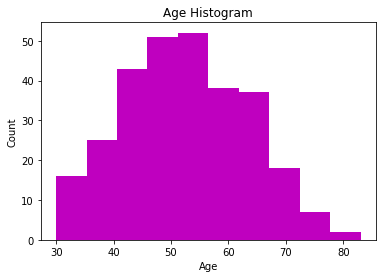

In [ ]:
plt.hist(df.Age, color = 'm')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Histogram")
plt.show()

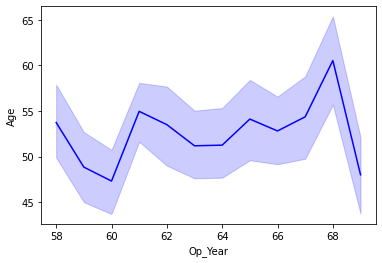

In [ ]:
sns.lineplot(x = df["Op_Year"], y = df['Age'], color = 'blue')

**Plot Boxplot for Axii_Nodes** 

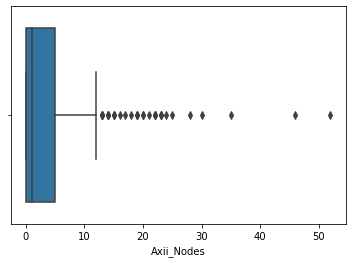

In [ ]:
sns.boxplot(df.Axii_Nodes)

**Plot the Age against Axii_Nodes** 

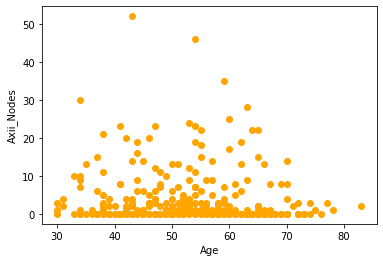

In [ ]:
plt.scatter(x = "Age", y = 'Axii_Nodes',data = df, color = 'orange')
plt.xlabel("Age")
plt.ylabel("Axii_Nodes")
plt.show()

**Show Total records for each year** 

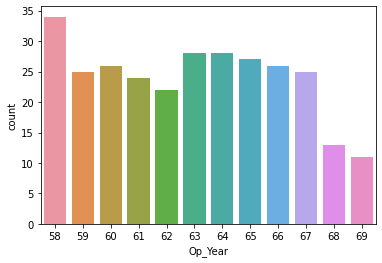

In [ ]:
sns.countplot(x = "Op_Year", data = df)
plt.show()

**Average of Axii_Nodes against Surv_Status** 

In [ ]:
df.groupby('Surv_Status')['Axii_Nodes'].mean()


Surv_Status
1    2.985714
2    7.506329
Name: Axii_Nodes, dtype: float64

_Which of the combination will produce similar below pie chart considering SUM as aggregation_

grp_label :  Int64Index([1, 2], dtype='int64', name='Surv_Status')
grp_value :  [627 593]


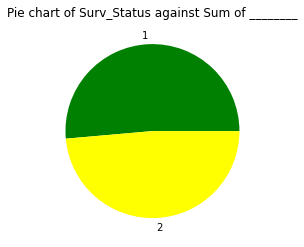

In [ ]:
grp_value = df.groupby('Surv_Status').sum()['Axii_Nodes'].values
grp_label = df.groupby('Surv_Status').sum().index


print("grp_label : ", grp_label)
print("grp_value : ", grp_value)


plt.pie(x = grp_value, labels=grp_label, colors = ['green', 'yellow'])
plt.title("Pie chart of Surv_Status against Sum of ________")
plt.show()